<a href="https://colab.research.google.com/github/jihankaruniaa/Pembelajaran-Mesin/blob/main/Jobsheet%204%20Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 4 - KLASIFIKASI

### Praktikum 1 - Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.



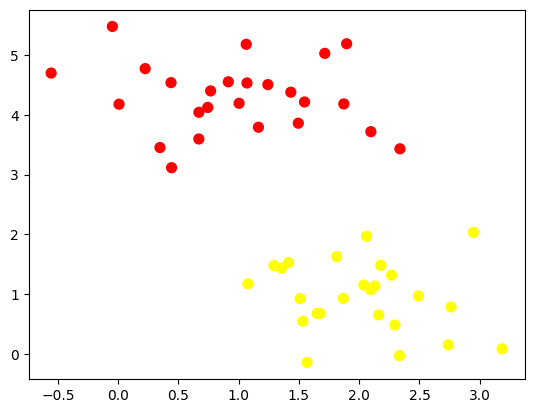

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

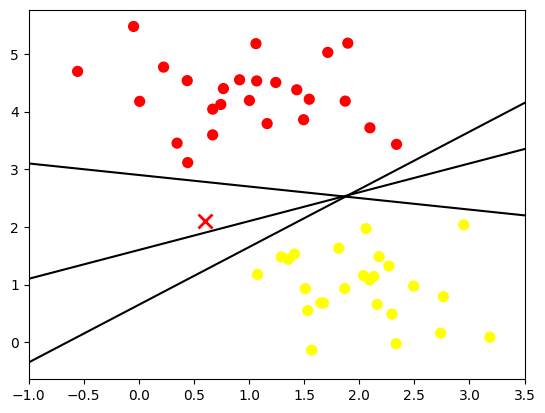

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

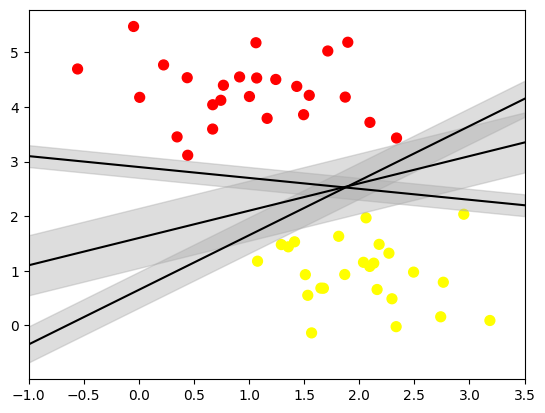

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

#### Penerapan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

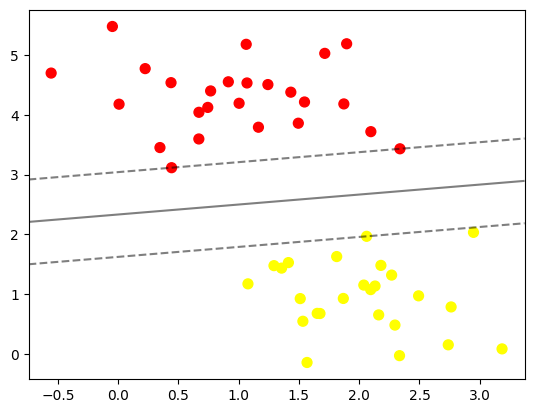

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

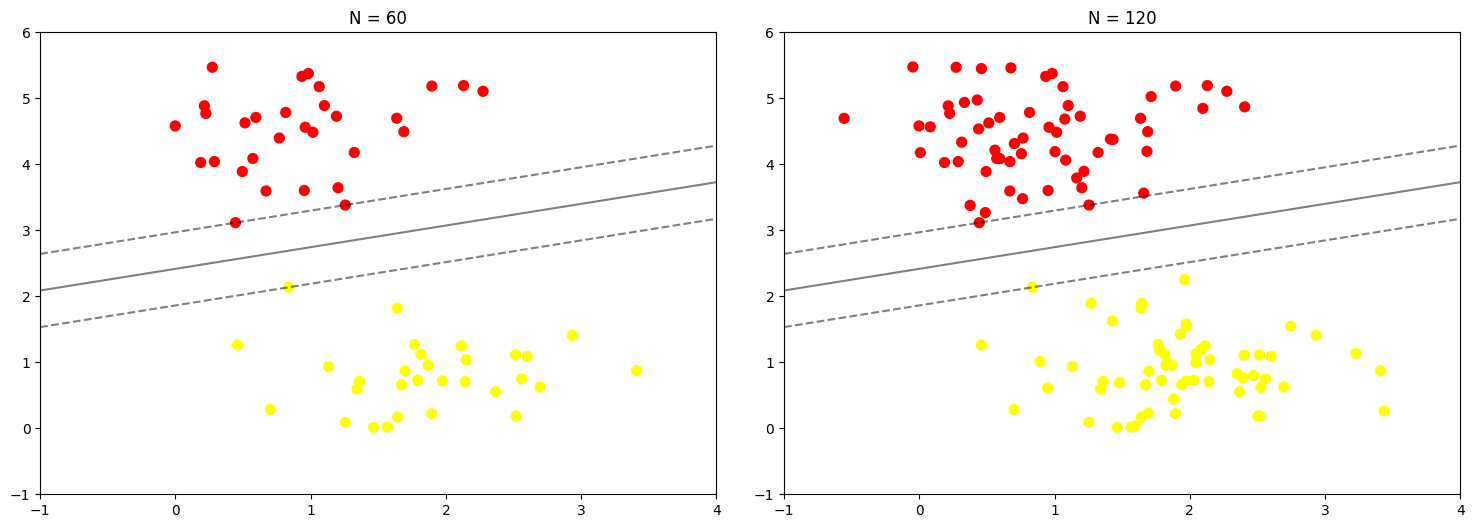

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

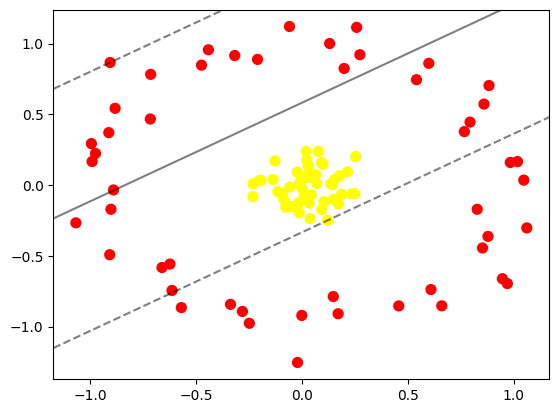

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 8.79109336e-01, -3.62975706e-01],
       [-2.07835202e-02, -1.25409243e+00],
       [-2.31281724e-01, -8.24200166e-02],
       [-9.02058495e-01, -1.71199712e-01],
       [-4.41698160e-01,  9.55767970e-01],
       [-6.13415297e-01, -7.45034135e-01],
       [-7.82133754e-03,  2.05637575e-02],
       [-5.69581245e-01, -8.66189927e-01],
       [ 6.52729079e-02,  7.29109485e-02],
       [ 8.28038720e-01, -1.71471362e-01],
       [ 1.08611307e-02, -8.58148146e-02],
       [-2.09551222e-01,  8.87769061e-01],
       [ 9.84716961e-01,  1.59787357e-01],
       [ 4.41316920e-02, -6.91901348e-02],
       [ 7.67268324e-01,  3.77597768e-01],
       [ 3.23164717e-02,  7.39373717e-02],
       [-1.27002913e-01,  1.70789238e-01],
       [-1.93227895e-01,  3.25577150e-02],
       [-1.06777068e+00, -2.67062629e-01],
       [ 2.50012325e-01, -6.18074527e-02],
       [ 2.74064751e-01,  9.20857284e-01],
       [ 4.57616370e-01, -8.54464490e-01],
       [-7.14420888e-01,  7.82265035e-01],
       [ 2.58563120e-01,  1.11456465e+00],
       [ 8.53263965e-01, -4.44899797e-01],
       [ 7.94230766e-01,  4.44757992e-01],
       [-3.37354573e-01, -8.43391529e-01],
       [ 2.97812571e-02,  1.32780565e-01],
       [-9.94570400e-01,  2.92897783e-01],
       [ 1.01859851e+00,  1.65734070e-01],
       [ 9.94459751e-02,  1.47418120e-01],
       [ 1.06233816e+00, -3.03116960e-01],
       [-2.48325656e-01, -9.77007791e-01],
       [-1.00242352e-02,  5.47256282e-03],
       [ 1.53977483e-01,  3.74817463e-02],
       [ 1.77932787e-01,  6.52968123e-02],
       [-8.44225371e-02, -1.02415866e-01],
       [ 9.37155488e-02, -1.73582952e-01],
       [ 6.09677080e-01, -7.38529002e-01],
       [ 2.53963260e-01,  2.00712884e-01],
       [ 2.76581444e-02,  5.22421134e-02],
       [ 9.70378197e-01, -6.96383985e-01],
       [-2.81094671e-01, -8.93398561e-01],
       [ 5.41244204e-01,  7.44511055e-01],
       [-1.55969761e-02, -1.27289353e-01],
       [-9.12258510e-01,  3.70578032e-01],
       [-6.23448380e-01, -5.58508091e-01],
       [-9.06160709e-01,  8.66066992e-01],
       [-4.45539871e-04, -9.21496140e-01],
       [ 2.30890307e-02,  1.75036033e-01],
       [ 1.04753863e-01, -1.18070463e-01],
       [-1.30741648e-02, -1.95907041e-01],
       [ 6.60714439e-01, -8.53782883e-01],
       [ 1.49212456e-01, -1.00318768e-01],
       [ 1.21901005e-01, -2.49222874e-01],
       [ 1.30733307e-02, -6.59965483e-02],
       [ 1.99453885e-01,  8.23814572e-01],
       [-8.82481833e-01,  5.42287764e-01],
       [-1.13608877e-01, -4.66429705e-02],
       [ 1.04815718e+00,  3.46871476e-02],
       [-3.17416058e-01,  9.15387655e-01],
       [ 3.90769220e-02, -2.37364230e-01],
       [ 1.48205346e-01, -7.88003082e-01],
       [ 2.35154193e-01, -6.24390330e-02],
       [-4.74401826e-01,  8.47335162e-01],
       [ 6.99932929e-02,  1.13696376e-02],
       [ 2.01831239e-02, -9.15049086e-02],
       [-5.08971159e-02, -1.52356326e-01],
       [-8.90002834e-01, -3.46956881e-02],
       [ 8.83729279e-01,  7.03037638e-01],
       [ 1.71183566e-01, -9.09719204e-01],
       [ 1.36877099e-01,  8.78169016e-03],
       [ 3.38924138e-02, -1.27066742e-01],
       [ 2.51840377e-02,  6.54367534e-02],
       [ 2.07543466e-02,  2.37970094e-01],
       [-7.16051765e-01,  4.66652729e-01],
       [-5.65430718e-02, -1.41960490e-02],
       [ 1.31025602e-01,  1.00032845e+00],
       [-6.60955847e-01, -5.82954933e-01],
       [ 8.60227922e-01,  5.72135994e-01],
       [ 9.47119407e-01, -6.62169852e-01],
       [ 2.14982504e-01,  9.25794715e-02],
       [-9.75173559e-01,  2.23015659e-01],
       [-9.07963482e-01, -4.92567682e-01],
       [ 9.24755714e-02,  1.59358272e-01],
       [-5.88294018e-02,  1.12065209e+00],
       [ 1.44506016e-01,  2.88573519e-03],
       [-2.31113016e-01,  9.30096841e-03],
       [-2.00732351e-02, -1.74114102e-01],
       [-2.03112345e-01,  2.92285422e-02],
       [-1.36198493e-01,  3.89133256e-02],
       [ 1.88067358e-01, -6.58422164e-02

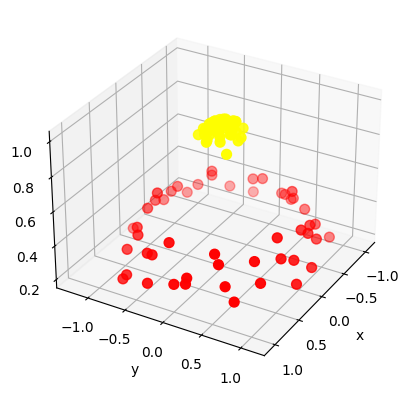

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

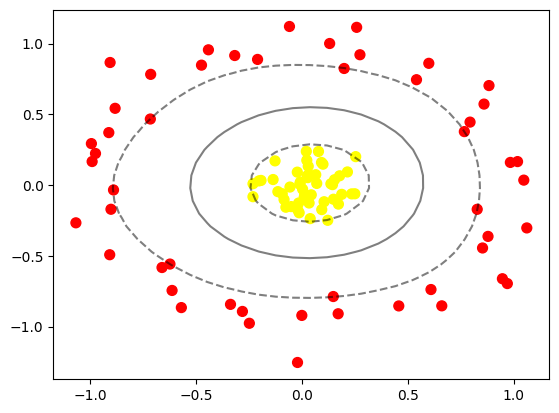

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#### Data Overlap

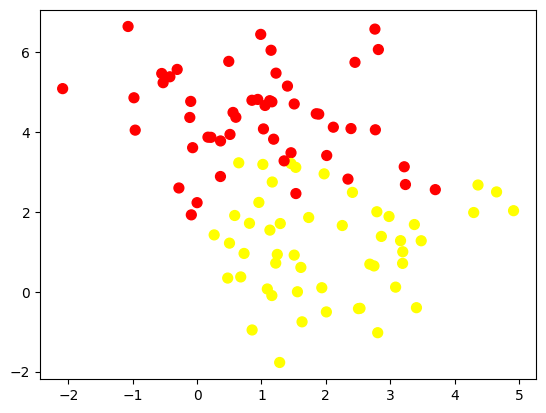

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

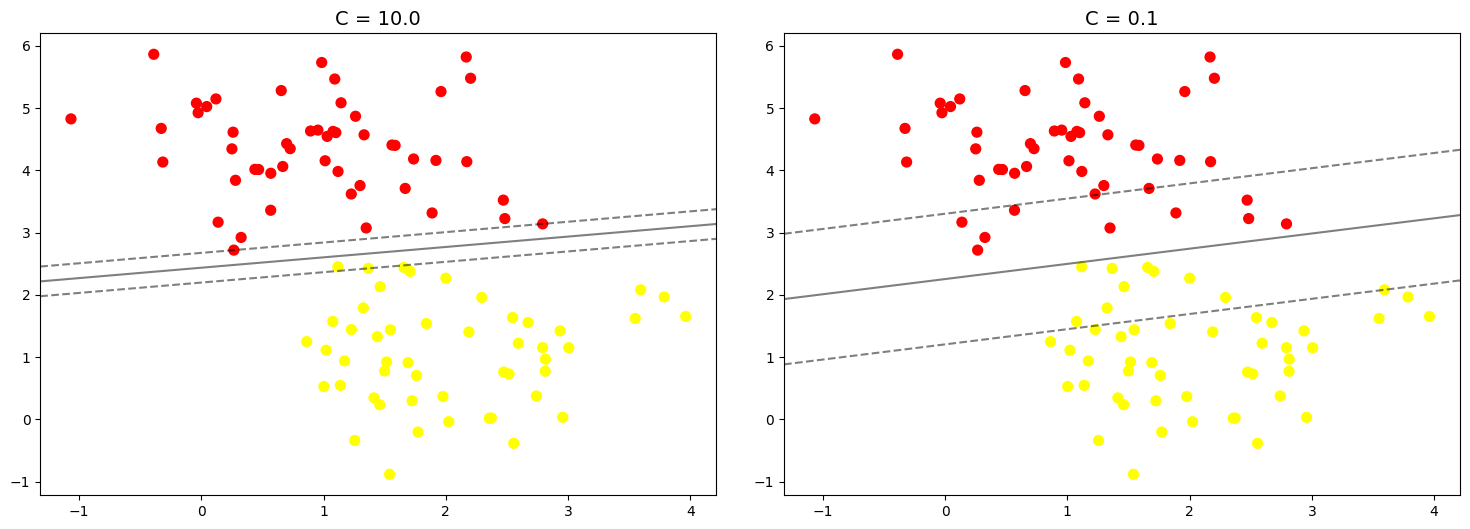

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

### Praktikum 2 - Klasifikasi SVM Pada Data Citra

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


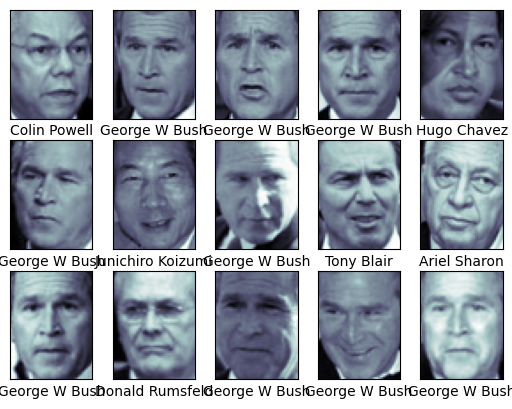

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 29s, sys: 25.4 s, total: 1min 54s
Wall time: 1min 13s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

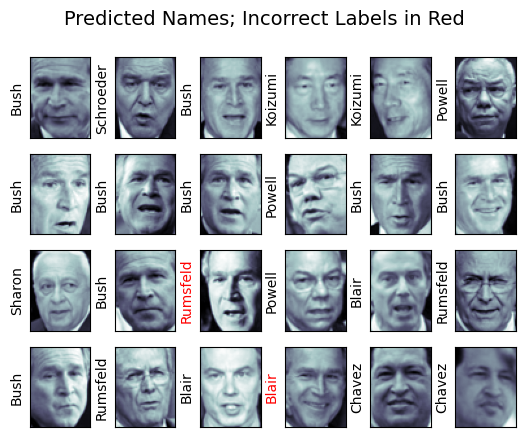

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

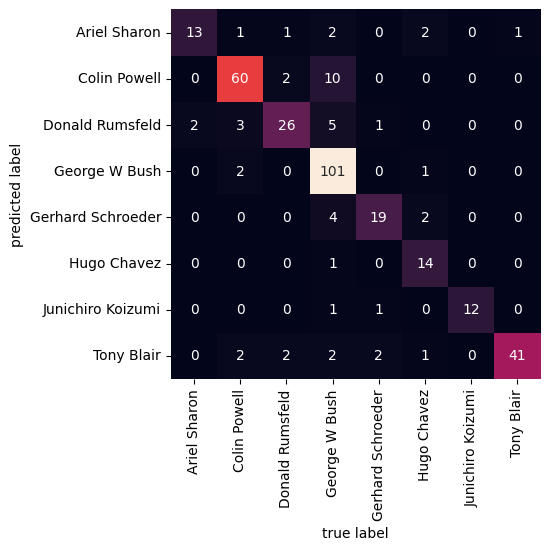

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Praktikum 3 - Klasifikasi Naive Bayes dengan Data Dummy

#### Mendefinisikan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[176  45]
 [130 104]
 [ 26 123]
 [180 110]
 [ 64 175]
 [192 129]
 [199   7]
 [155 173]
 [222   9]
 [204  48]
 [ 47 144]
 [ 11  86]
 [  5  68]
 [204 134]
 [  3 163]
 [ 75  49]
 [ 31  89]
 [ 95   5]
 [153 198]
 [ 94  94]
 [ 79  44]
 [131 180]
 [ 69  43]
 [128  48]
 [ 56 154]
 [126  56]
 [113  76]
 [ 74 132]
 [ 39 175]
 [ 42 182]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

- n_samples: jumlah sampel yang diinginkan
- n_features: jumlah fitur yang digunakan
- n_classes: jumlah kelas
- n_informative: jumlah fitur yang memiliki korelasi dengan kelas
- n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
- n_repeated: jumlah fitur yang diulang

#### (Opsional) Membuat Data Frame

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,176,45,0
1,130,104,0
2,26,123,0
3,180,110,0
4,64,175,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,176,45,Kelas B
1,130,104,Kelas B
2,26,123,Kelas B
3,180,110,Kelas B
4,64,175,Kelas B


#### (Opsional) Visualisasi Data

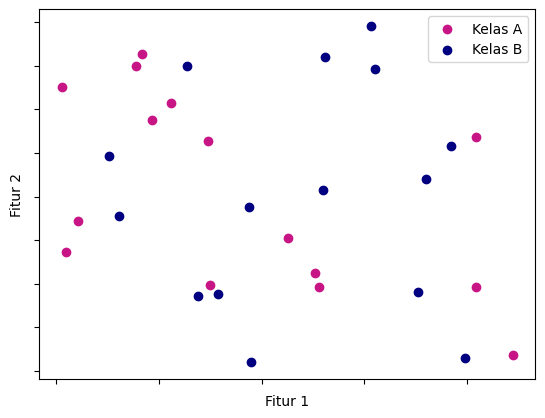

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

#### Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.5555555555555556


#### Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.2222222222222222


### Praktikum 4 - Klasifikasi Naive Bayes Pada Data Multinomial

#### Load Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/spam.csv', encoding='latin-1')
# spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

#### Pra Pengolahan Data
Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# INSPEKSI DATA
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# ENCODE LABEL

# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Memisahkan Fitur dengan Label

X = df['SMS'].values
y = df['Labels'].values

#### Ekstraksi Fitur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
# Mengambil 100 fitur teratas
top_100_features = bow.get_feature_names_out()[:100]

# Menampilkan 100 fitur teratas, masing-masing pada baris baru
print("[")
for feature in top_100_features:
    print(f"'{feature}',")
print("]")

# Menampilkan dimensi data
print(f'Dimensi data: {X_train.shape}')

[
'00',
'000',
'000pes',
'008704050406',
'0089',
'01223585334',
'0125698789',
'02',
'0207',
'02072069400',
'02073162414',
'021',
'03',
'04',
'0430',
'05',
'050703',
'0578',
'06',
'07',
'07008009200',
'07046744435',
'07090201529',
'07123456789',
'0721072',
'07732584351',
'07734396839',
'07742676969',
'07753741225',
'0776xxxxxxx',
'07781482378',
'07786200117',
'077xxx',
'07808',
'07808247860',
'07815296484',
'07821230901',
'07880867867',
'0789xxxxxxx',
'07946746291',
'0796xxxxxx',
'07973788240',
'07xxxxxxxxx',
'08',
'0800',
'08000407165',
'08000776320',
'08000839402',
'08000930705',
'08000938767',
'08001950382',
'08002888812',
'08002986030',
'08002986906',
'08002988890',
'08006344447',
'0808',
'08081263000',
'08081560665',
'0825',
'083',
'0844',
'08448350055',
'08448714184',
'0845',
'08452810071',
'08452810073',
'08452810075over18',
'0870',
'08700435505150p',
'08701213186',
'08701417012',
'08701417012150p',
'0870141701216',
'087016248',
'08701752560',
'087018728737',
'0870241182716',
'08

#### Training dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


### Praktikum 5 -Klasifikasi Citra Siang dan Malam

##### Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/images/images/training"
test_dir = "/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/images/images/test"

##### Langkah 1 - Load Data dan Visualisasikan

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 0,  1,  0],
         [ 7,  9,  8],
         [10, 12, 11],
         ...,
         [ 4,  3,  1],
         [13, 12, 10],
         [10,  9,  7]],
 
        [[ 0,  2,  1],
         [ 6,  8,  7],
         [ 8, 10,  9],
         ...,
         [ 9,  8,  6],
         [14, 13, 11],
         [ 5,  4,  2]],
 
        [[20, 20, 20],
         [21, 21, 21],
         [21, 21, 21],
         ...,
         [ 9,  8,  6],
         [13, 12, 10],
         [ 3,  2,  0]],
 
        ...,
 
        [[18, 14, 13],
         [ 3,  0,  0],
         [11,  7,  6],
         ...,
         [ 5,  6,  1],
         [11, 12,  7],
         [13, 15, 10]],
 
        [[32, 28, 27],
         [ 3,  0,  0],
         [11,  7,  6],
         ...,
         [13, 15, 10],
         [30, 32, 27],
         [41, 46, 40]],
 
        [[25, 21, 20],
         [13,  9,  8],
         [24, 20, 19],
         ...,
         [ 0,  5,  0],
         [ 9, 14,  8],
         [ 9, 16,  9]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 29
(469, 640, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: night


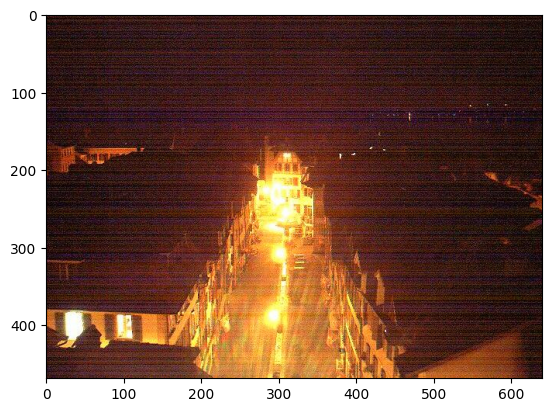

In [ ]:
random_img_viz(train_img)

##### Langkah 3 - Pra Pengolahan Data

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 64
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


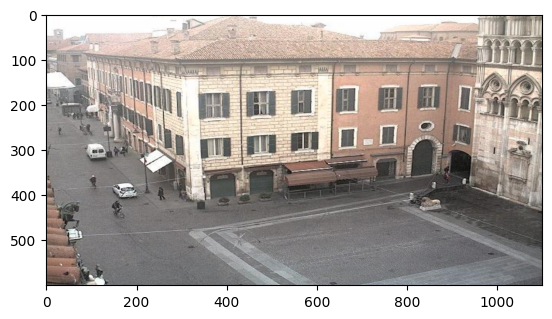

In [ ]:
random_img_viz(train_std_img_list)

##### Langkah 4 - Ekstraksi Fitur

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 115
Avg Brighness: 89.9058


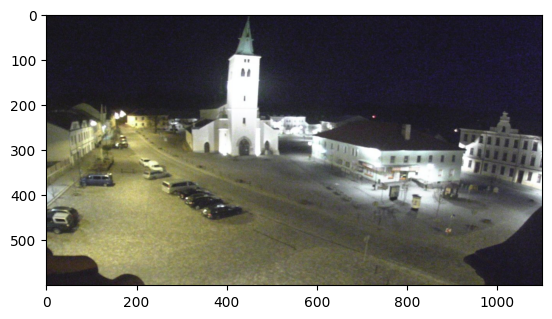

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

##### Langkah 5 - Klasifikasi dengan Metode Threshold

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 94
Actual label: 0
Predicted label: 0


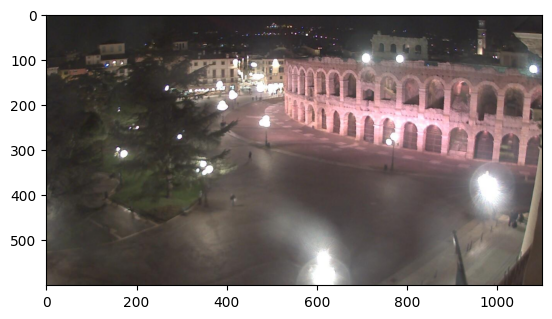

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

##### Langkah 6 - Evaluasi (Manual)

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


#### Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

##### Langkah 4 alternatif - Membuat Feature Vectors

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,25.646491,0.0
1,25.731924,0.0
2,25.626109,0.0
3,29.071326,0.0
4,114.884670,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,8.217803,0.0
1,13.861829,0.0
2,98.888133,0.0
3,89.473241,0.0
4,13.861638,0.0


##### Langkah 5 alternatif

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

##### Langkah 6 alternatif

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


### TUGAS 1

##### 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [ ]:
# import library
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/voice.csv', encoding='latin-1')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Missing values per column:
 meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Accuracy: 0.9763406940063092
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



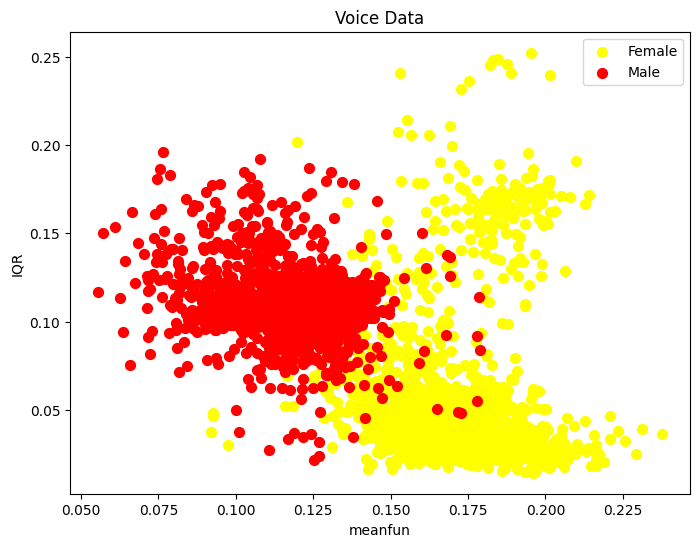

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Separate features and target labels
X = data.drop('label', axis=1)
y = data['label']

# Encode the target labels (0 for male, 1 for female)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Scatter plot of two features
# Choose two features from the dataset (replace 'meanfun' and 'IQR' with features of your choice)
feature1 = 'meanfun'  # Pilih fitur pertama (misal 'meanfun')
feature2 = 'IQR'      # Pilih fitur kedua (misal 'IQR')

plt.figure(figsize=(8, 6))

# Plot the points with different colors for each class
plt.scatter(data[data['label'] == 'female'][feature1], data[data['label'] == 'female'][feature2],
            color='yellow', label='Female', s=50)
plt.scatter(data[data['label'] == 'male'][feature1], data[data['label'] == 'male'][feature2],
            color='red', label='Male', s=50)

# Labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Voice Data')
plt.legend()

# Show the plot
plt.show()


Missing values per column:
 meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Accuracy: 0.9763406940063092
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       310
           1       0.97      0.99      0.98       324

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



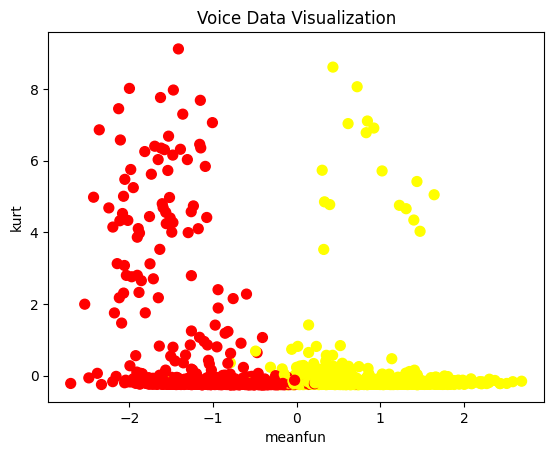

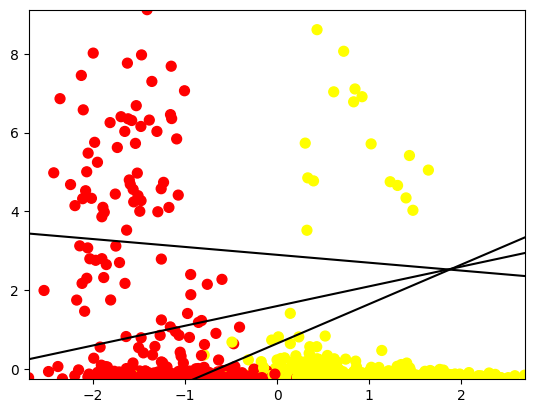

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Separate features and target labels
X = data.drop('label', axis=1)  # Assuming 'label' is the target column
y = data['label']

# Encode the target labels if they are categorical
y = y.replace({'male': 0, 'female': 1})  # Example encoding, adjust as per your dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC(kernel='rbf', C=1.8, random_state=58)  # Using RBF kernel as per the second script
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization of the decision boundary using two features
# Choose two features for visualization
feature1 = 'meanfun'
feature2 = 'kurt'

# Checking if the features are present in the dataset
if feature1 in X.columns and feature2 in X.columns:
    # Select only the two chosen features
    X_vis = X_train[:, [X.columns.get_loc(feature1), X.columns.get_loc(feature2)]]
    y_vis = y_train

    # Create a scatter plot
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, cmap="autumn")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Voice Data Visualization')
    plt.show()

    # Plot SVM decision boundary
    xfit = np.linspace(X_vis[:, 0].min(), X_vis[:, 0].max())
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, cmap='autumn')
    plt.plot([8.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

    # Plot decision boundaries
    for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
        plt.plot(xfit, m * xfit + b, '-k')
    plt.xlim(X_vis[:, 0].min(), X_vis[:, 0].max())
    plt.ylim(X_vis[:, 1].min(), X_vis[:, 1].max())
    plt.show()
else:
    print(f"One or both of the features '{feature1}' or '{feature2}' not found in the dataset.")


##### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan

Classification Report:
              precision    recall  f1-score   support

         ham       0.89      0.97      0.93       965
        spam       0.61      0.26      0.36       150

    accuracy                           0.88      1115
   macro avg       0.75      0.62      0.65      1115
weighted avg       0.86      0.88      0.86      1115



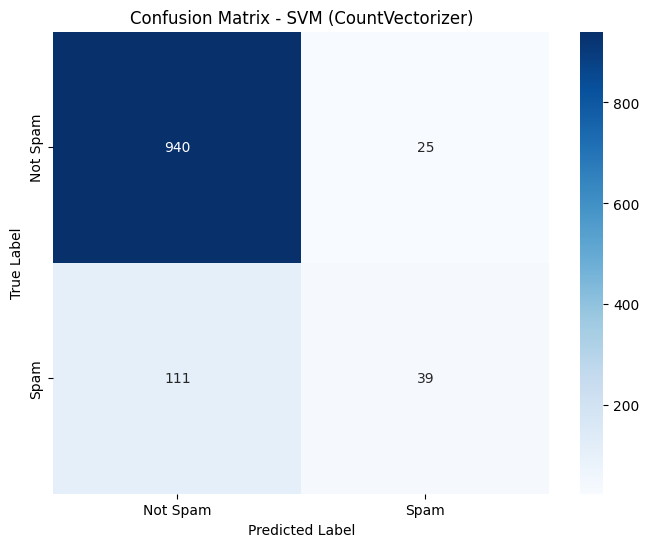

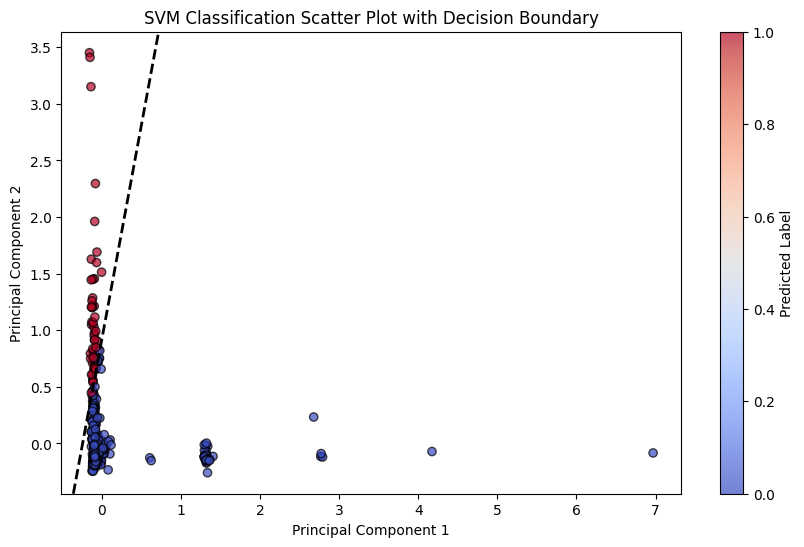

In [ ]:
# Import library
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Memuat data
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/spam.csv', encoding='latin-1')

# Memisahkan fitur dan target
X = data['v2']  # Kolom pesan
y = data['v1']  # Kolom label

# Inisiasi CountVectorizer dengan stop_words aktif
vectorizer = CountVectorizer(stop_words='english')

# Memisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting dan transform data dengan CountVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Transformasi data ke dua dimensi dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())
X_test_pca = pca.transform(X_test_vec.toarray())

# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

# Memprediksi pada data testing
y_pred = svm_model.predict(X_test_pca)

# Evaluasi hasil
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualisasi
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - SVM (CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Mengonversi label prediksi dan label aktual ke format numerik untuk visualisasi
y_pred_numeric = np.where(y_pred == 'ham', 0, 1)
y_test_numeric = np.where(y_test == 'ham', 0, 1)

# Visualisasi hasil dengan scatter plot
plt.figure(figsize=(10, 6))

# Visualisasi Scatter Plot dengan Decision Boundary
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_numeric, cmap='coolwarm', marker='o', edgecolor='k', alpha=0.7)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contour = plt.contour(xx, yy, Z, colors=['k'], levels=[0], linewidths=2, linestyles='--')

plt.title('SVM Classification Scatter Plot with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Predicted Label')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(data.iloc[:,2:], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename kolom v1 dan v2
data = data.rename(columns=new_cols)

# cek data
data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data['Labels'] = data['Labels'].map(new_labels)

data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Inisiasi CountVectorizer dengan stop_words aktif
vectorizer = CountVectorizer(stop_words='english')

# Memisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting dan transform data dengan CountVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inisialisasi dan latih model Naive Bayes dengan CountVectorizer
nb_model_count = MultinomialNB()
nb_model_count.fit(X_train_vec, y_train)

# Prediksi pada data uji
y_pred_nb_count = nb_model_count.predict(X_test_vec)

# Evaluasi hasil model Naive Bayes dengan CountVectorizer
print("Accuracy Naive Bayes (CountVectorizer):", accuracy_score(y_test, y_pred_nb_count))
print("\nClassification Report (CountVectorizer):\n", classification_report(y_test, y_pred_nb_count))

Accuracy Naive Bayes (CountVectorizer): 0.9838565022421525

Classification Report (CountVectorizer):
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115




##### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Gunakan TfidfVectorizer dengan stop words
tfidf = TfidfVectorizer(stop_words='english')
x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

# Inisialisasi dan latih model Naive Bayes dengan TF-IDF
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(x_train_tfidf, y_train)

# Prediksi pada data uji
y_pred_nb_tfidf = nb_model_tfidf.predict(x_test_tfidf)

# Evaluasi hasil model Naive Bayes dengan TF-IDF
print("Accuracy Naive Bayes (TF-IDF):", accuracy_score (y_test, y_pred_nb_tfidf))
print("\nClassification Report (TF-IDF):\n", classification_report(y_test, y_pred_nb_tfidf))

Accuracy Naive Bayes (TF-IDF): 0.9668161434977578

Classification Report (TF-IDF):
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### TUGAS 2
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Fungsi untuk menghitung histogram citra
def get_histogram(image, bins=32):
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Fungsi untuk memuat citra dan label dari folder
def load_images_and_labels(image_dir):
    labels = []
    features = []
    for label in ['day', 'night']:  # Nama subfolder sebagai label
        path = os.path.join(image_dir, label)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize citra
                hist = get_histogram(img)  # Ekstraksi fitur histogram
                features.append(hist)
                labels.append(0 if label == 'day' else 1)  # Day = 0, Night = 1
    return np.array(features), np.array(labels)

# Path ke folder dataset
train_image_dir = '/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/images/images/training'
test_image_dir = '/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 4/images/images/test'

# Memuat data citra dan label dari folder training
X_train, y_train = load_images_and_labels(train_image_dir)

# Memuat data citra dan label dari folder test
X_test, y_test = load_images_and_labels(test_image_dir)

# Inisiasi model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Evaluasi hasil prediksi
print("Accuracy SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy SVM: 0.94375

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.95      0.94      0.94        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160

